In [1]:
import pandas as pd

from sklearn import preprocessing, compose, pipeline
from sklearn import linear_model # LogisticRegression

from sklearn import set_config

set_config(display='diagram') # Useful for display the pipeline

In [2]:
df = pd.read_csv("train.csv")
df.sample(5)

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
270787,451459,A,A,A,A,B,B,A,E,E,...,0.487056,0.337323,0.376731,0.347759,0.360166,0.356979,0.322842,0.349551,0.715924,8.008596
272004,453477,A,A,B,C,B,D,A,E,C,...,0.382239,0.385161,0.345361,0.407832,0.554727,0.720496,0.711361,0.683862,0.817874,6.832396
113024,188302,A,B,B,C,B,B,A,E,E,...,0.261390,0.262584,0.255484,0.291647,0.314580,0.123639,0.319919,0.339175,0.300346,8.770507
223453,372636,A,A,A,C,B,B,A,E,G,...,0.857610,0.599881,0.731739,0.238392,0.809547,0.459873,0.869117,0.844648,0.282714,7.899977
50180,83379,A,B,A,C,B,D,A,B,A,...,0.894526,0.750170,0.535493,0.934295,0.795327,0.909680,0.794396,0.849301,0.726542,8.378162


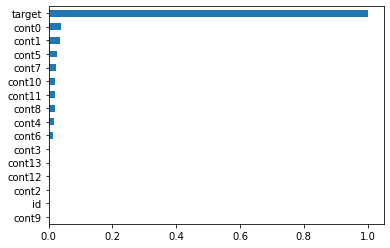

In [3]:
df.corr()["target"].abs().sort_values().plot.barh();

In [4]:
cont_features = [f for f in df.columns.tolist() if f.startswith('cont')]
cat_features  = [f for f in df.columns.tolist() if f.startswith('cat')]

# Create linear model

In [5]:
num_preprocessing = pipeline.Pipeline(steps=[
    ('scaler', preprocessing.StandardScaler())
])

cat_preporcessing = pipeline.Pipeline(steps=[
    ('onehot', preprocessing.OneHotEncoder(handle_unknown='ignore'))
])

prepro = compose.ColumnTransformer(transformers=[
    ('num', num_preprocessing, cont_features),
    ('cat', cat_preporcessing, cat_features),
], remainder='drop') # Drop other vars not specified in num_vars or cat_vars


model = linear_model.LinearRegression()

pipe = pipeline.Pipeline(steps=[('prepro', prepro), ('model', model)])

pipe

Pipeline(steps=[('prepro',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['cont0', 'cont1', 'cont2',
                                                   'cont3', 'cont4', 'cont5',
                                                   'cont6', 'cont7', 'cont8',
                                                   'cont9', 'cont10', 'cont11',
                                                   'cont12', 'cont13']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['cat0', 'cat1', 'cat2',
                                                   'cat3', 'cat4', 'cat5',
                                                   'cat6', 'cat7', 'cat8',
                                                   'cat9'])])),
                ('model', LinearRegression())])

# Train linear model

In [6]:
x = df[cont_features + cat_features ]
y = df["target"]

pipe.fit(x, y)

Pipeline(steps=[('prepro',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['cont0', 'cont1', 'cont2',
                                                   'cont3', 'cont4', 'cont5',
                                                   'cont6', 'cont7', 'cont8',
                                                   'cont9', 'cont10', 'cont11',
                                                   'cont12', 'cont13']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['cat0', 'cat1', 'cat2',
                                                   'cat3', 'cat4', 'cat5',
                                                   'cat6', 'cat7', 'cat8',
                                                   'cat9'])])),
                ('model', LinearRegression())])

# See coefficients

In [11]:
cat_onehot_features = pipe["prepro"].named_transformers_["cat"]['onehot'].get_feature_names(cat_features).tolist()

all_features = cont_features + cat_onehot_features
len(all_features)

70

In [13]:
coefs = pipe["model"].coef_.tolist()

In [14]:
coefs_df = pd.DataFrame(data=coefs, index=all_features, columns=["Coefs"])
coefs_df

,Coefs
cont0,-5.863777e-02
cont1,3.628011e-02
cont2,1.773693e-03
cont3,-5.698778e-03
cont4,-5.333955e-03
...,...
cat9_K,-8.281560e+10
cat9_L,-8.281560e+10
cat9_M,-8.281560e+10
cat9_N,-8.281560e+10


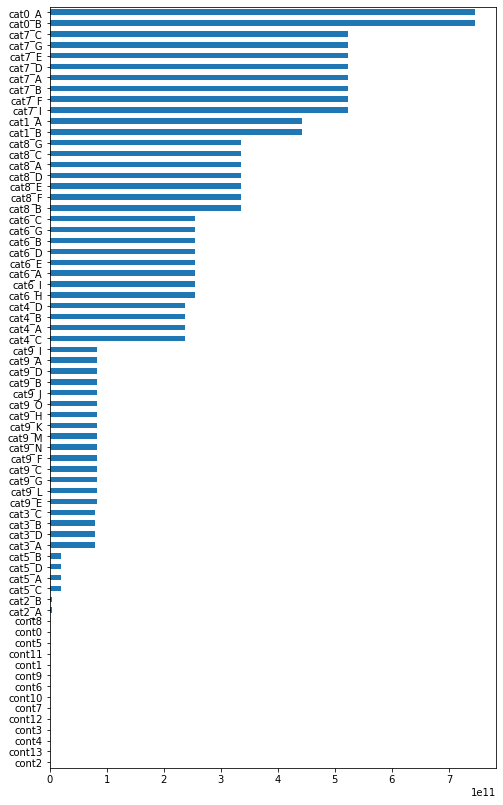

In [15]:
coefs_df["Coefs"].abs().sort_values().plot.barh(figsize=(8,14));

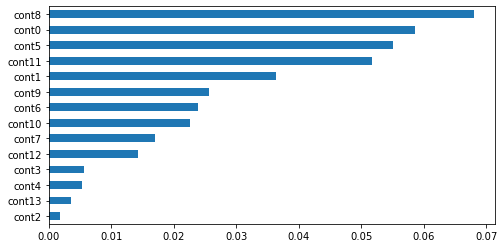

In [16]:
coefs_df.head(14)["Coefs"].abs().sort_values().plot.barh(figsize=(8,4));